# Basics

_Jenny Kim, Phil Marshall_

In this notebook we demonstrate some of the basic functionality of the `SLRealizer` class, including:

* Reading in an `OM10` mock lens catalog and selecting a subsample of lenses to work on.

* Reading in an observation history, and setting up a list of `LensSystem` objects.

* Visualizing the `SLRealizer` model for a given lens system, showing the positions, sizes and brightnesses of lens galaxy and lensed quasars, at each epoch. 

### Requirements

You will need to have the `om10` package installed:
```
pip install om10
```

## Reading in the Lens Catalog and Observation History

First, we import OM10 and panda to read the data file.

In [7]:
import om10
import pandas as pd
import plotting

Then, we import the `twincles_observation_history.csv` file to the variable named `obsHist`.

In [8]:
# Read the data
pd.set_option('display.max_columns', None)
obsHist = pd.read_csv("../../data/twinkles_observation_history.csv",index_col=0).as_matrix()

Next, we read in the lens system from the OM10 catalog. Let's choose one lens system from the db database. If you do not have `qso_mock.fits` file, you can download it here : [OM10 Repository](https://github.com/drphilmarshall/OM10/tree/master/data).

In [9]:
db = om10.DB(catalog='/Users/Jenny/Desktop/om10fork/om10/data/qso_mock.fits')
db.paint(synthetic=True)
# Pull out a specific lens and plot it:
id = 7176527
lens = db.get_lens(id)

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
OM10: Extracted OM10 lens number 7176527:
 LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------- -------- ---- ----- ... ------------- ------------- -------------
7176527        0    2 0.556 ...         20.15 20.1126048692 20.5846573621


## Visualizing a `LensSystem`

In [10]:
import pylab
import matplotlib
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

Populating the interactive namespace from numpy and matplotlib


/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plotting', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
# This file def needs stylistic improvement
# Not concise at all

##aagagaghaajaj it used to run what is ur problemdmmm
# Axis got messed up
import plotting

XIMG and YIMG are the x and y sky positions, East and North of the lens
galaxy center, of the quasar image positions. If NIM=2 then the last two
values are zero, but if its a quad system then all four values should be
non-zero. Note that the MAG and time delay arrays also have four
components, for the image magnifications and time delays. You'll need to
use these maginfications when predicting image fluxes in each band based on
your painted sources.

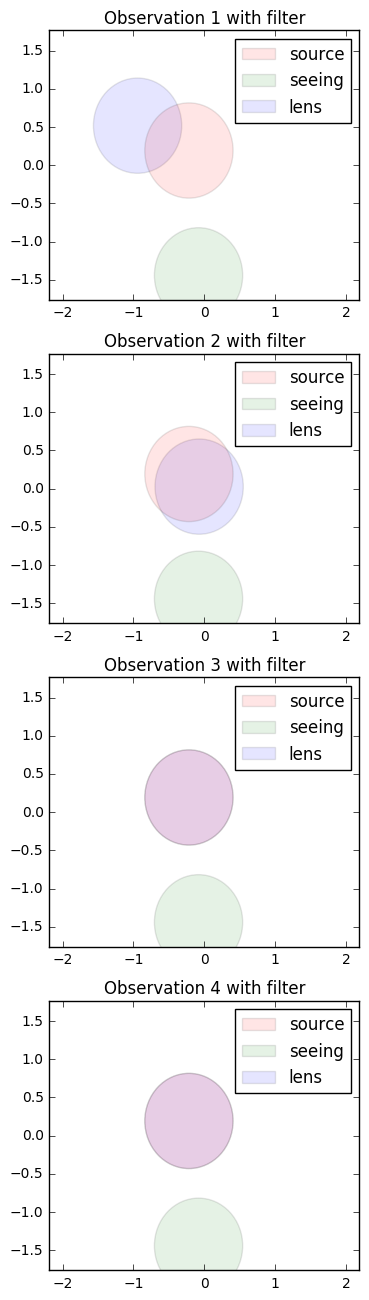

In [12]:
# Python is zero indexed again
# Pick second observation
plotting.plot_lens(lens, obsHist[150])